In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
df = pd.read_csv("data_preprocessed.csv")
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.524780,1.0,0.792992,0.622545,0.666667,1.0,0.465753,0.625000,0.0,0.0,0.711022,1.0,0.338009,0.000000,0.666667,0.75,3
1,0.258801,0.0,0.297105,0.325484,0.666667,1.0,0.023310,0.507414,0.0,0.0,0.042645,1.0,0.000000,0.646730,0.666667,0.75,2
2,0.475505,1.0,0.723608,0.355762,0.666667,1.0,0.285714,0.000000,0.0,0.0,0.362750,1.0,0.498366,0.400000,0.000000,0.75,5
3,0.424484,1.0,0.544808,0.426051,1.000000,1.0,0.285714,0.625000,0.0,0.0,0.555116,1.0,0.720433,0.514847,0.666667,0.75,2
4,0.499824,1.0,0.749063,0.623040,0.666667,1.0,0.544648,0.528761,0.0,0.0,0.520723,1.0,0.249183,0.144864,0.666667,0.75,3


In [11]:
# Pisahkan fitur dan target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]

# Split data untuk modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modeling and Evaluation (Decision Tree, Random Forest, SVM)

In [12]:
# Inisialisasi model
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

In [13]:
# Untuk menyimpan hasil evaluasi
results = {}

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.82      0.91      0.86        74
           2       0.84      0.82      0.83        74
           3       0.99      0.93      0.96        74
           4       0.91      1.00      0.95        74
           5       0.91      0.78      0.84        74
           6       0.83      0.84      0.83        74

    accuracy                           0.89       517
   macro avg       0.89      0.89      0.89       517
weighted avg       0.89      0.89      0.89       517


=== Random Forest ===
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        73
           1       0.79      0.95      0.86        74
           2       0.96      0.88      0.92        74
           3       0.97      0.95      0.96        74
           4       0.99      1.00      0.99        74
           5       0.90      0.8

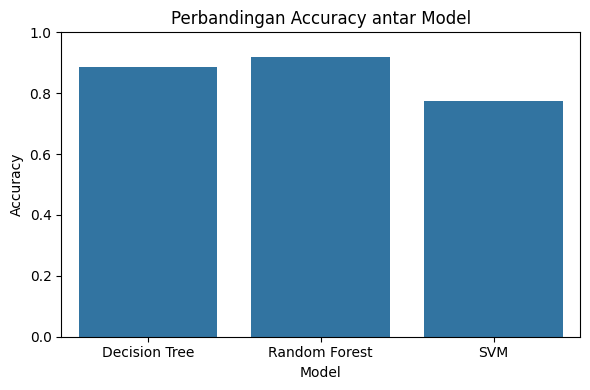

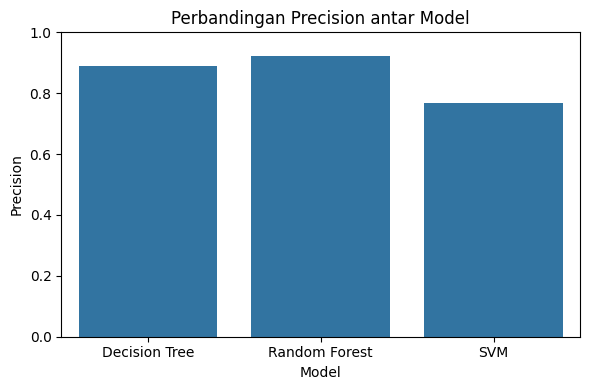

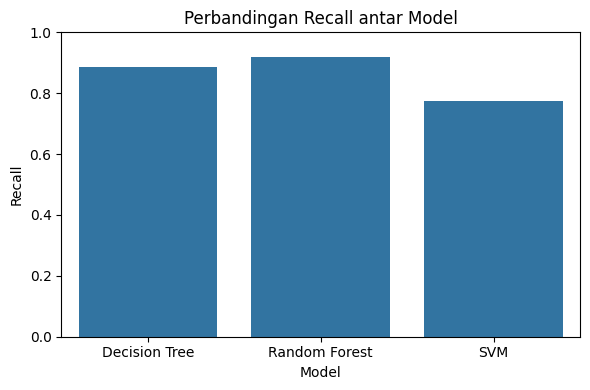

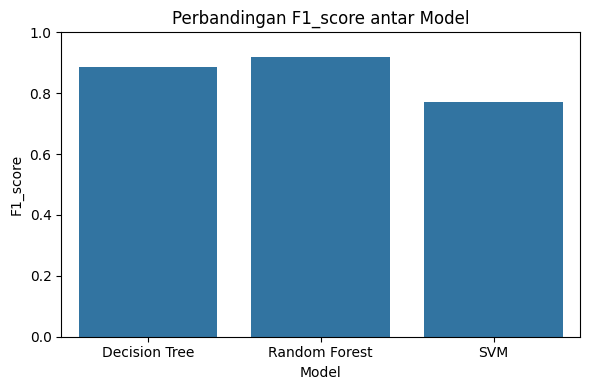

In [15]:
# Visualisasi perbandingan metrik
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(6, 4))
    plt.title(f'Perbandingan {metric.capitalize()} antar Model')
    sns.barplot(x=list(results.keys()), y=[results[m][metric] for m in results])
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()

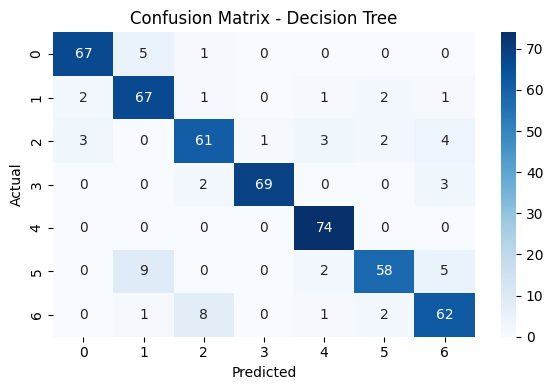

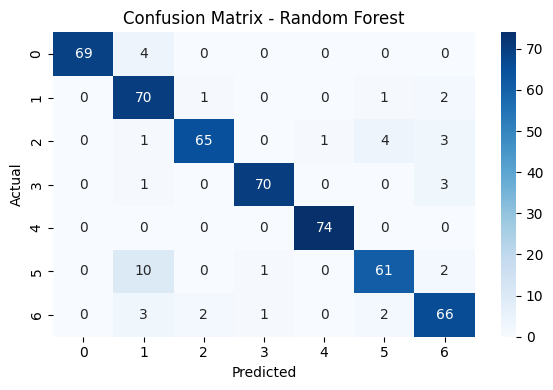

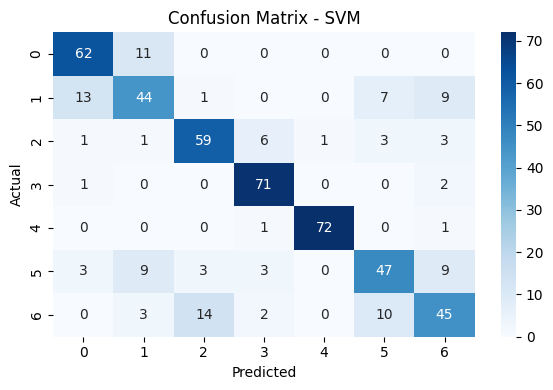

In [16]:
# Visualisasi confusion matrix
for name in results:
    plt.figure(figsize=(6, 4))
    sns.heatmap(results[name]['conf_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Hyperparameter Tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [19]:
grid_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [20]:
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_

y_pred_dt = best_dt.predict(X_test)

In [21]:
print("\n=== Decision Tree (Tuned) ===")
print(classification_report(y_test, y_pred_dt))


=== Decision Tree (Tuned) ===
              precision    recall  f1-score   support

           0       0.93      0.92      0.92        73
           1       0.84      0.91      0.87        74
           2       0.82      0.82      0.82        74
           3       0.99      0.93      0.96        74
           4       0.91      0.99      0.95        74
           5       0.87      0.82      0.85        74
           6       0.86      0.82      0.84        74

    accuracy                           0.89       517
   macro avg       0.89      0.89      0.89       517
weighted avg       0.89      0.89      0.89       517



# Random Forest

In [22]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [23]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [24]:
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

In [25]:
print("\n=== Random Forest (Tuned) ===")
print(classification_report(y_test, y_pred_rf))


=== Random Forest (Tuned) ===
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        73
           1       0.80      0.96      0.87        74
           2       0.97      0.88      0.92        74
           3       0.97      0.95      0.96        74
           4       1.00      1.00      1.00        74
           5       0.92      0.80      0.86        74
           6       0.82      0.93      0.87        74

    accuracy                           0.92       517
   macro avg       0.93      0.92      0.92       517
weighted avg       0.93      0.92      0.92       517



# SVM

In [26]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [27]:
grid_svm = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)

In [28]:
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

In [29]:
print("\n=== SVM (Tuned) ===")
print(classification_report(y_test, y_pred_svm))


=== SVM (Tuned) ===
              precision    recall  f1-score   support

           0       0.85      0.99      0.91        73
           1       0.84      0.72      0.77        74
           2       0.87      0.93      0.90        74
           3       0.93      0.92      0.93        74
           4       0.99      0.97      0.98        74
           5       0.76      0.78      0.77        74
           6       0.79      0.73      0.76        74

    accuracy                           0.86       517
   macro avg       0.86      0.86      0.86       517
weighted avg       0.86      0.86      0.86       517



# Perbandingan Performa

In [30]:
# Data performa sebelum tuning
before = {
    "Decision Tree": results["Decision Tree"],
    "Random Forest": results["Random Forest"],
    "SVM": results["SVM"]
}

In [31]:
# Data performa sesudah tuning
after = {
    "Decision Tree": {
        "accuracy": accuracy_score(y_test, y_pred_dt),
        "precision": precision_score(y_test, y_pred_dt, average='weighted'),
        "recall": recall_score(y_test, y_pred_dt, average='weighted'),
        "f1_score": f1_score(y_test, y_pred_dt, average='weighted')
    },
    "Random Forest": {
        "accuracy": accuracy_score(y_test, y_pred_rf),
        "precision": precision_score(y_test, y_pred_rf, average='weighted'),
        "recall": recall_score(y_test, y_pred_rf, average='weighted'),
        "f1_score": f1_score(y_test, y_pred_rf, average='weighted')
    },
    "SVM": {
        "accuracy": accuracy_score(y_test, y_pred_svm),
        "precision": precision_score(y_test, y_pred_svm, average='weighted'),
        "recall": recall_score(y_test, y_pred_svm, average='weighted'),
        "f1_score": f1_score(y_test, y_pred_svm, average='weighted')
    }
}

In [32]:
metrics = ["accuracy", "precision", "recall", "f1_score"]
model_names = ["Decision Tree", "Random Forest", "SVM"]
x = np.arange(len(model_names))
width = 0.2

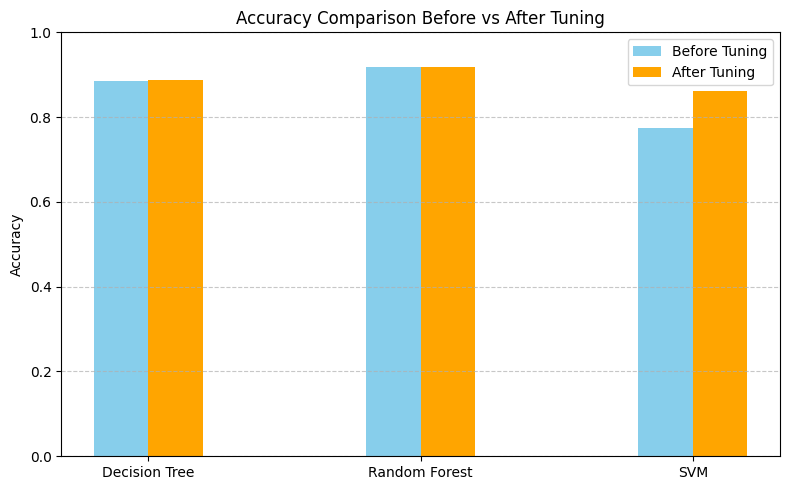

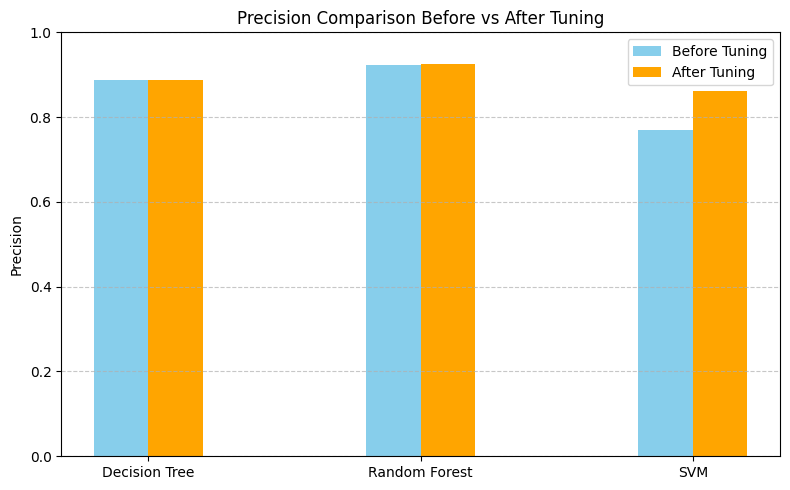

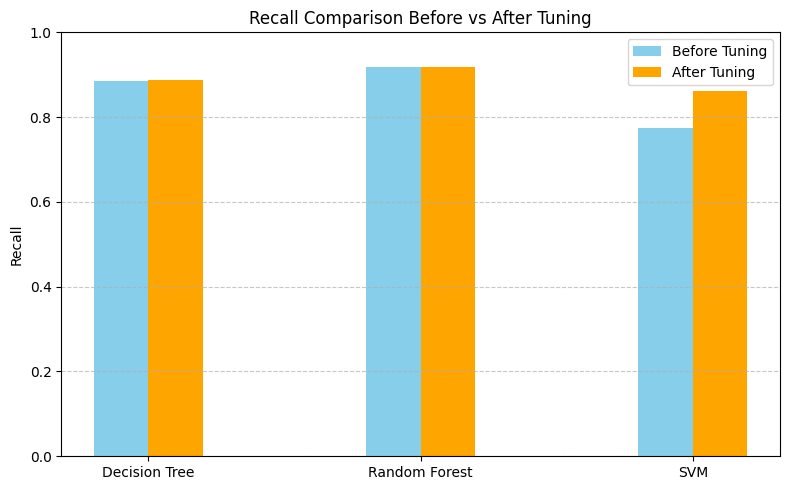

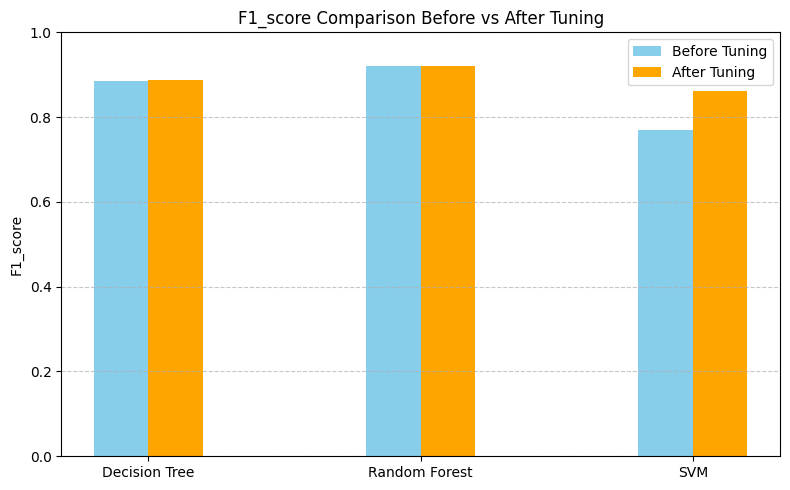

In [33]:
for metric in metrics:
    plt.figure(figsize=(8, 5))
    before_scores = [before[model][metric] for model in model_names]
    after_scores = [after[model][metric] for model in model_names]

    plt.bar(x - width/2, before_scores, width, label='Before Tuning', color='skyblue')
    plt.bar(x + width/2, after_scores, width, label='After Tuning', color='orange')

    plt.xticks(x, model_names)
    plt.ylim(0, 1)
    plt.ylabel(metric.capitalize())
    plt.title(f'{metric.capitalize()} Comparison Before vs After Tuning')
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()